## Домашнее задание «Логистическая регрессия и дискриминантный анализ»

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

<div class="alert alert-success">
<h4>1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)</h4>
</div>

In [3]:
iris = load_iris()

In [4]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
variety = iris.target

In [6]:
# справочно: 'target_names': array(['setosa', 'versicolor', 'virginica']

variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Немного ботаники:<br>
sepal = чашели́стик (лат. sepala) — отдельная часть чашечки цветка.<br>
petal = лепесток (лат. pétalum от др.-греч. πέταλον — лист, цветок) — внутренний видоизменённый лист околоцветника в цветке покрытосеменных растений.

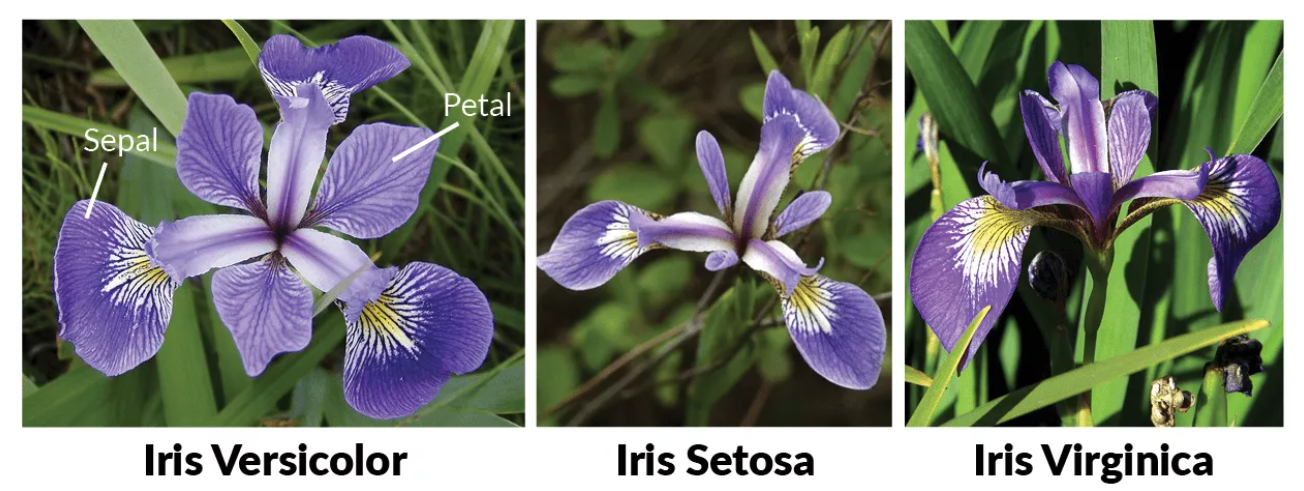

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


<div class="alert alert-success">
<h4>2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety</h4>
</div>

In [9]:
data_sepal = (data.iloc[:,[0,1]]
                  .rename(columns={'sepal length (cm)': 'sepal_length', 'sepal width (cm)': 'sepal_width'}))

In [10]:
data_sepal.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


<div class="alert alert-success">
<h4>3. Разделите данные на выборку для обучения и тестирования</h4>
</div>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data_sepal, variety, test_size=0.25, random_state=42)

<div class="alert alert-success">
<h4>4. Постройте модель LDA</h4>
</div>

In [12]:
lda = LinearDiscriminantAnalysis()

In [13]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [14]:
y_pred = lda.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

0.868421052631579

<div class="alert alert-success">
<h4>5. Визуализируйте предсказания для тестовой выборки и центры классов</h4>
</div>

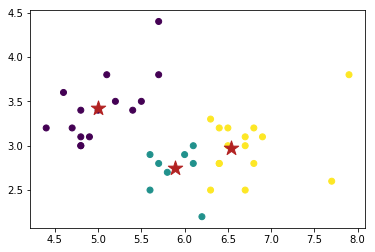

In [16]:
plt.scatter(X_test['sepal_length'], X_test['sepal_width'], c=y_pred)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='firebrick', s=230, marker='*')

<div class="alert alert-success">
<h4>6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width</h4>
</div>

In [17]:
data_sepal.tail()

,sepal_length,sepal_width
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4
149,5.9,3.0


<div class="alert alert-success">
<h4>7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию</h4>
</div>

In [18]:
k_inertia = []
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_sepal)
    k_inertia.append(clf_kmeans.inertia_)

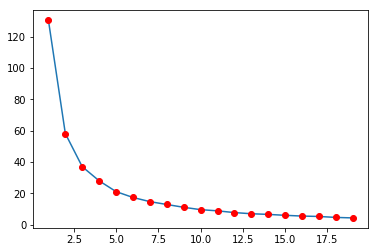

In [19]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

#### Пусть будет 4 кластера:

In [20]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(data_sepal)

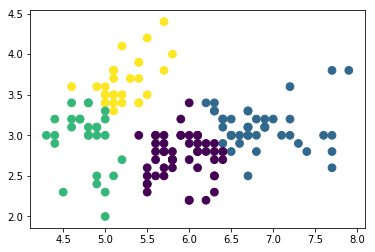

In [21]:
plt.scatter(data_sepal.iloc[:, 0], data_sepal.iloc[:, 1], c=clusters, s=60)